In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
import json

from io import StringIO
from openpyxl import load_workbook
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

np.set_printoptions(suppress=True, precision=int)

c:\program files\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Load Factor (Predictor) - Resultados

In [34]:
results = pd.read_excel('results.xlsx', sheet_name='LoadFactorTest1540228903')

results = results[ results['R2 SCORE'] >= 0 ]

grouped_airports = results.groupby('Aeroporto', as_index=False).agg({'R2 SCORE': ['min', 'max', 'mean'], 'RMSE': ['min', 'max', 'mean']})

grouped_airports.columns= ['Aeroporto', 'R2 (MIN)', 'R2 (MAX)', 'R2 (AVG)', 'RMSE (MIN)', 'RMSE (MAX)', 'RMSE (AVG)']

grouped_airports_size = results.groupby('Aeroporto', as_index=False).size()

grouped_algorithms = results.groupby('Algoritmo', as_index=False).agg({'R2 SCORE': ['min', 'max', 'mean'], 'RMSE': ['min', 'max', 'mean']})

grouped_algorithms.columns= ['Aeroporto', 'R2 (MIN)', 'R2 (MAX)', 'R2 (AVG)', 'RMSE (MIN)', 'RMSE (MAX)', 'RMSE (AVG)']

grouped_algorithms_size = results.groupby('Algoritmo', as_index=False).size()

tests_amount = np.average(grouped_airports_size)

airports_list = grouped_airports['Aeroporto']

print("Testes Realizados : %d" % (len(results)) )
print("Nº Testes Médio por Aeroporto : %d" % (tests_amount))
print("Aeroportos Analisados : %s" % (", ".join(airports_list.values)))

Testes Realizados : 4054
Nº Testes Médio por Aeroporto : 579
Aeroportos Analisados : SBBR, SBFZ, SBGL, SBGR, SBJE, SBPA, SBSV


# Média Geral por Algoritmo

In [21]:
grouped_algorithms

Aeroporto  R2 (MIN)  R2 (MAX)  R2 (AVG)  RMSE (MIN)  \
0  DecisionTreeRegressor  0.026380  0.989149  0.857858    0.023353   
1     ExtraTreeRegressor  0.000630  0.979652  0.703299    0.025216   
2  RandomForestRegressor  0.128977  0.994771  0.876218    0.014952   

   RMSE (MAX)  RMSE (AVG)  
0    0.430910    0.084609  
1    0.552557    0.141834  
2    0.430551    0.077341

#  Média Geral por Aeroporto

In [22]:
grouped_airports

Aeroporto  R2 (MIN)  R2 (MAX)  R2 (AVG)  RMSE (MIN)  RMSE (MAX)  RMSE (AVG)
0      SBBR  0.711252  0.993032  0.950002    0.014952    0.095597    0.034788
1      SBFZ  0.111018  0.990379  0.747434    0.020746    0.471541    0.146743
2      SBGL  0.035727  0.989149  0.808118    0.036743    0.552557    0.171577
3      SBGR  0.022176  0.994771  0.813933    0.018425    0.362455    0.124080
4      SBJE  0.000630  0.945161  0.575988    0.035844    0.227277    0.091851
5      SBPA  0.044892  0.988528  0.863360    0.022464    0.253526    0.077187
6      SBSV  0.222198  0.992153  0.903471    0.017322    0.181157    0.056789

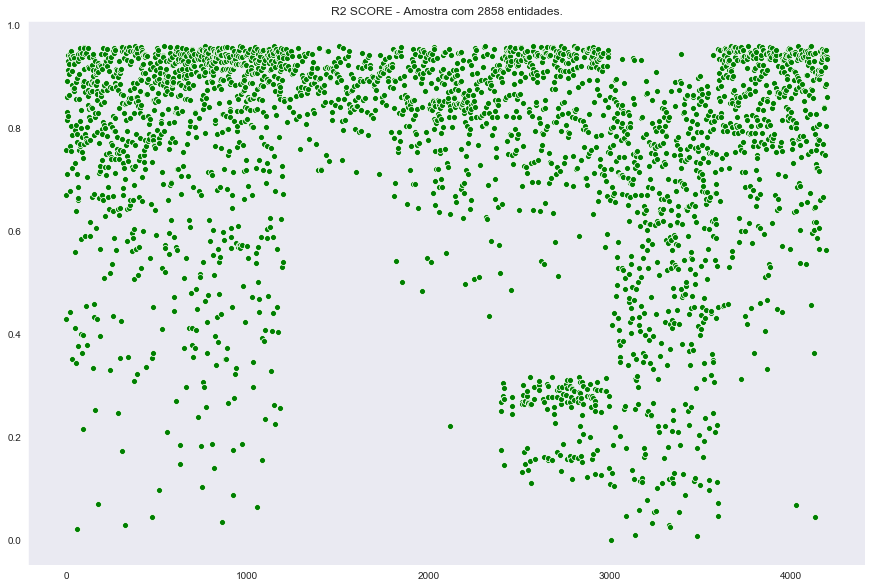

In [23]:
plotdata = results[ (results['R2 SCORE'] >= 0) & (results['R2 SCORE'] < 0.96) ]['R2 SCORE']

f, ax = plt.subplots(figsize=(15, 10))
sns.set_style("dark")
ax.set_title("R2 SCORE - Amostra com %d entidades." % len(plotdata))
sns.scatterplot(data=plotdata, color="green", ax=ax)

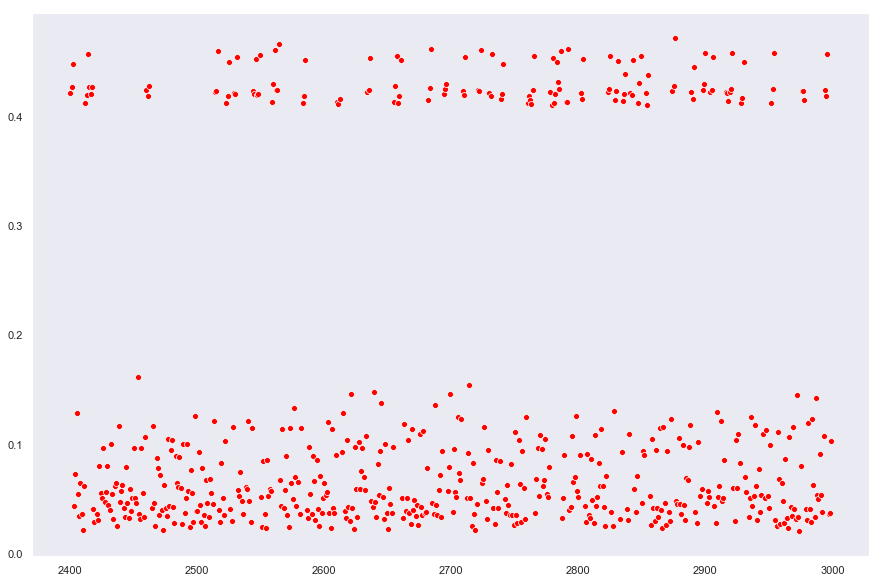

In [36]:
#plotdata = results[ results['RMSE'] > 0.05 ]['RMSE']
plotdata = results[ results['Aeroporto'] == 'SBFZ' ]['RMSE']

f, ax = plt.subplots(figsize=(15, 10))
sns.set_style("dark")
#ax.set_title("RMSE - Amostra com %d entidades." % len(plotdata))
sns.scatterplot(data=plotdata, color="red", marker="o", ax=ax)

# Flight Classificator - Resultados

In [2]:
results = pd.read_excel('results.xlsx', sheet_name='FlightClassification1540908238')

grouped_airports = results.groupby('Aeroporto', as_index=False).agg({'Accuracy': ['min', 'max', 'mean'], 'FI_ANO': 'mean', 'FI_MES': 'mean', 'FI_PAX_PAGOS': 'mean', 'FI_DECOLAGENS': 'mean', 'FI_ASSENTOS': 'mean', 'FI_ASK': 'mean', 'FI_RPK': 'mean'})

grouped_airports.columns = ['Aeroporto', 'Accuracy (MIN)', 'Accuracy (MAX)', 'Accuracy (AVG)', 'FI_ANO (AVG)', 'FI_MES (AVG)', 'FI_PAX (AVG)', 'FI_DECOLAGENS (AVG)', 'FI_ASSENTOS (AVG)', 'FI_ASK (AVG)', 'FI_RPK (AVG)']


grouped_algorithms = results.groupby('Algoritmo', as_index=False).agg({'Accuracy': ['min', 'max', 'mean'], 'FI_ANO': 'mean', 'FI_MES': 'mean', 'FI_PAX_PAGOS': 'mean', 'FI_DECOLAGENS': 'mean', 'FI_ASSENTOS': 'mean', 'FI_ASK': 'mean', 'FI_RPK': 'mean'})

grouped_algorithms.columns= ['Algoritmo', 'Accuracy (MIN)', 'Accuracy (MAX)', 'Accuracy (AVG)', 'FI_ANO (AVG)', 'FI_MES (AVG)', 'FI_PAX (AVG)', 'FI_DECOLAGENS (AVG)', 'FI_ASSENTOS (AVG)', 'FI_ASK (AVG)', 'FI_RPK (AVG)']

grouped_algorithms_size = results.groupby('Algoritmo', as_index=False).size()

# Média Geral por Algoritmo

In [3]:
grouped_algorithms

Algoritmo  Accuracy (MIN)  Accuracy (MAX)  Accuracy (AVG)  \
0  DecisionTreeClassifier        0.714286             1.0        0.820275   
1    ExtraTreesClassifier        0.761905             1.0        0.841506   
2  RandomForestClassifier        0.714286             1.0        0.839725   

   FI_ANO (AVG)  FI_MES (AVG)  FI_PAX (AVG)  FI_DECOLAGENS (AVG)  \
0      0.094885      0.083138      0.324590             0.172601   
1      0.089018      0.064385      0.265883             0.197103   
2      0.097958      0.072729      0.266322             0.190935   

   FI_ASSENTOS (AVG)  FI_ASK (AVG)  FI_RPK (AVG)  
0           0.130985      0.127957      0.065844  
1           0.148795      0.129871      0.104944  
2           0.135471      0.133584      0.103002

# Média Geral por Aeroporto

In [4]:
grouped_airports

Aeroporto  Accuracy (MIN)  Accuracy (MAX)  Accuracy (AVG)  FI_ANO (AVG)  \
0      SBBR        0.846944        0.876453        0.864407      0.088064   
1      SBFZ        0.784489        0.831904        0.812618      0.102001   
2      SBGL        0.776705        0.813671        0.798900      0.089387   
3      SBGR        0.807576        0.838427        0.825445      0.077403   
4      SBJE        0.714286        1.000000        0.910238      0.099804   
5      SBPA        0.764151        0.809815        0.790778      0.104686   
6      SBSV        0.808391        0.850083        0.834462      0.096329   

   FI_MES (AVG)  FI_PAX (AVG)  FI_DECOLAGENS (AVG)  FI_ASSENTOS (AVG)  \
0      0.062395      0.314080             0.219762           0.119371   
1      0.078381      0.320884             0.207742           0.111162   
2      0.064555      0.329973             0.137195           0.152373   
3      0.061003      0.225593             0.196934           0.194566   
4      0.097205      0.215976             0.126535           0.142699   
5      0.078971      0.305556             0.193272           0.124419   
6      0.071410      0.287125             0.226720           0.124327   

   FI_ASK (AVG)  FI_RPK (AVG)  
0      0.120164      0.076162  
1      0.103286      0.076543  
2      0.140195      0.086322  
3      0.155355      0.089146  
4      0.160790      0.156991  
5      0.115141      0.077955  
6      0.118364      0.075724

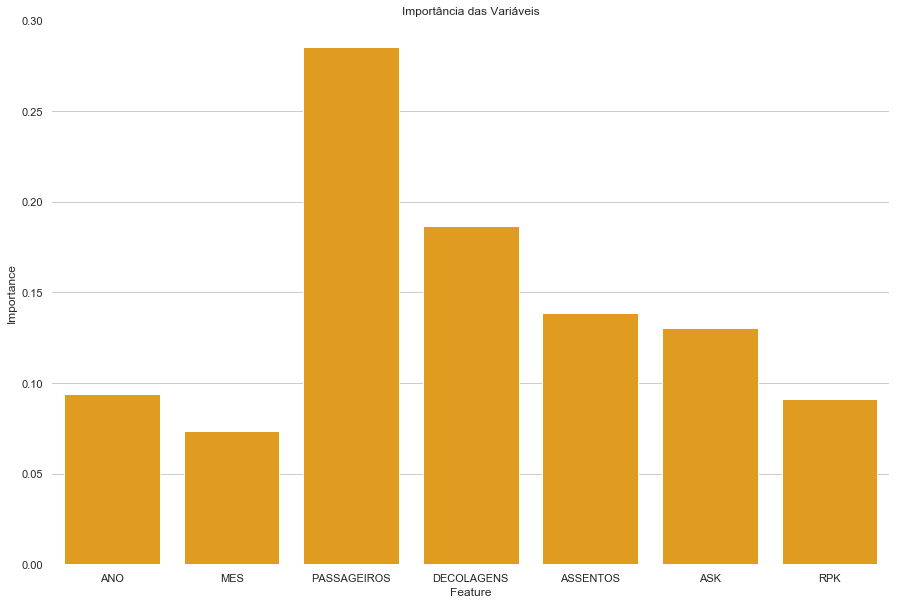

In [5]:
featured_importances = []

featured_importances.append({ "Feature": "ANO", "Importance": grouped_airports['FI_ANO (AVG)'].mean() })
featured_importances.append({ "Feature": "MES", "Importance": grouped_airports['FI_MES (AVG)'].mean() })
featured_importances.append({ "Feature": "PASSAGEIROS", "Importance": grouped_airports['FI_PAX (AVG)'].mean() })
featured_importances.append({ "Feature": "DECOLAGENS", "Importance": grouped_airports['FI_DECOLAGENS (AVG)'].mean() })
featured_importances.append({ "Feature": "ASSENTOS", "Importance": grouped_airports['FI_ASSENTOS (AVG)'].mean() })
featured_importances.append({ "Feature": "ASK", "Importance": grouped_airports['FI_ASK (AVG)'].mean() })
featured_importances.append({ "Feature": "RPK", "Importance": grouped_airports['FI_RPK (AVG)'].mean() })

featured_importances = pd.DataFrame(featured_importances)

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 10))

ax.set_title("Importância das Variáveis")
sns.set_color_codes("pastel")
sns.despine(left=True, bottom=True)
sns.barplot(x="Feature", y="Importance", data=featured_importances, color="orange")

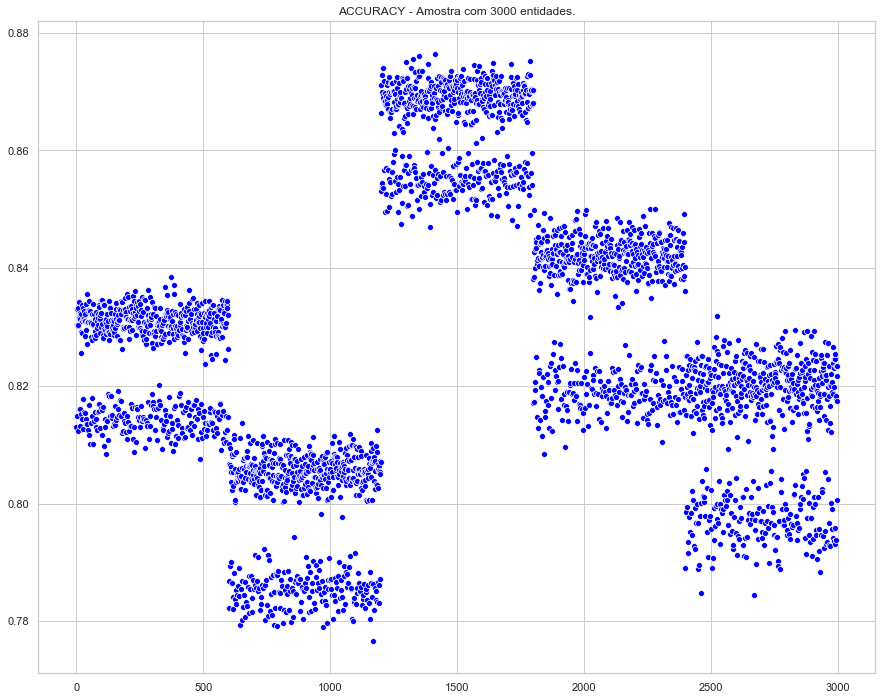

In [6]:
plotdata = results[0:3000]['Accuracy']

f, ax = plt.subplots(figsize=(15, 12))
sns.set_style("dark")
ax.set_title("ACCURACY - Amostra com %d entidades." % len(plotdata))
sns.scatterplot(data=plotdata, color="blue", ax=ax)

   Improdutivo  Não-Regular  Regular
0        794.0        171.0     69.0
1        290.0       2220.0    746.0
2        145.0        840.0   7498.0


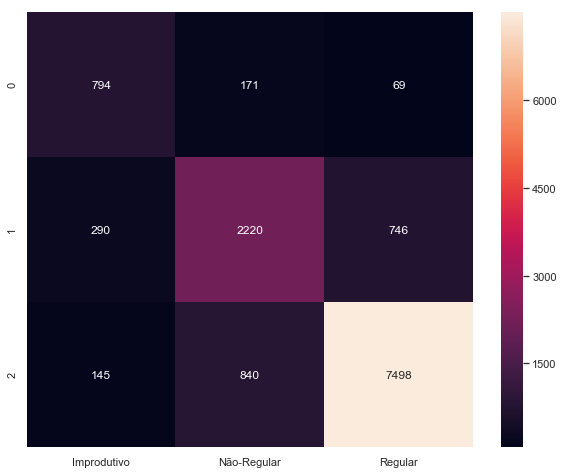

In [7]:
'''

confusion_matrix_avg = np.array([ int(element / len(results))  for element in confusion_matrix.reshape(1, -1)[0] ]).reshape(3, 3)

confusion_matrix_df = pd.DataFrame( confusion_matrix_avg, columns=["Improdutivo", "Não-Regular", "Regular"] )

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_matrix_df, annot=True, fmt='g', ax=ax)
'''

values = []
acc = [[],[],[]]

for i in range(0, len(results)):
    confusion_matrix_data = np.array(json.load(StringIO(results.loc[i]['confusion_matrix'])))
    if confusion_matrix_data.shape == (2, 2):
        acc[1].append( np.concatenate([[0],confusion_matrix_data[0]]) )
        acc[2].append( np.concatenate([[0],confusion_matrix_data[1]]) )
        continue
    
    acc[0].append( confusion_matrix_data[0] )
    acc[1].append( confusion_matrix_data[1] )
    acc[2].append( confusion_matrix_data[2] )

confusion_matrix = np.array([ np.floor(np.array(acc[0]).sum(axis=0) / len(results)), np.floor(np.array(acc[1]).sum(axis=0) / len(results)), np.floor(np.array(acc[2]).sum(axis=0) / len(results)) ])

confusion_matrix_df = pd.DataFrame( confusion_matrix, columns=["Improdutivo", "Não-Regular", "Regular"] )

print( confusion_matrix_df )

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_matrix_df, annot=True, fmt='g', ax=ax)

# PAX predictor (Monthly)

In [37]:
results = pd.read_excel('results.xlsx', sheet_name='PaxMonthPredict1540218568')

results = results[ results['R2 SCORE'] >= 0 ]

grouped_airports = results.groupby('Aeroporto', as_index=False).agg({'R2 SCORE': ['min', 'max', 'mean'], 'RMSE': ['min', 'max', 'mean'], 'FI_ANO': ['min', 'max', 'mean'], 'FI_PAX_PAGOS': ['min', 'max', 'mean']})

grouped_airports.columns= ['Aeroporto', 'R2 (MIN)', 'R2 (MAX)', 'R2 (AVG)', 'RMSE (MIN)', 'RMSE (MAX)', 'RMSE (AVG)', 'FI_ANO (MIN)', 'FI_ANO (MAX)', 'FI_ANO (AVG)', 'FI_PAX (MIN)', 'FI_PAX (MAX)', 'FI_PAX (AVG)']

grouped_airports_size = results.groupby('Aeroporto', as_index=False).size()


grouped_algorithms = results.groupby('Algoritmo', as_index=False).agg({'R2 SCORE': ['min', 'max', 'mean'], 'RMSE': ['min', 'max', 'mean']})

grouped_algorithms.columns= ['Aeroporto', 'R2 (MIN)', 'R2 (MAX)', 'R2 (AVG)', 'RMSE (MIN)', 'RMSE (MAX)', 'RMSE (AVG)']

grouped_algorithms_size = results.groupby('Algoritmo', as_index=False).size()


grouped_months = results.groupby('Mes', as_index=False).agg({'R2 SCORE': ['min', 'max', 'mean'], 'RMSE': ['min', 'max', 'mean']})

grouped_months.columns= ['Mes', 'R2 (MIN)', 'R2 (MAX)', 'R2 (AVG)', 'RMSE (MIN)', 'RMSE (MAX)', 'RMSE (AVG)']


grouped_airport_months = results.groupby(['Aeroporto', 'Mes'], as_index=False).agg({'R2 SCORE': ['min', 'max', 'mean'], 'RMSE': ['min', 'max', 'mean']})

grouped_airport_months.columns= ['Aeroporto', 'Mes', 'R2 (MIN)', 'R2 (MAX)', 'R2 (AVG)', 'RMSE (MIN)', 'RMSE (MAX)', 'RMSE (AVG)']

# Média Geral por Aeroporto

In [18]:
grouped_airports

Aeroporto  R2 (MIN)  R2 (MAX)  R2 (AVG)    RMSE (MIN)     RMSE (MAX)  \
0      SBBR  0.009833  0.999038  0.829100  11818.901885  321349.924452   
1      SBFZ  0.000612  0.997081  0.804451   8357.725684  165185.344288   
2      SBGL  0.009126  0.997486  0.814925  16705.015299  380657.134999   
3      SBGR  0.002569  0.998707  0.894170  33466.036523  704144.779923   
4      SBPA  0.001524  0.999241  0.813290   5445.239595  190000.509912   
5      SBSV  0.000472  0.999797  0.695674   2976.693139  247179.210320   

      RMSE (AVG)  FI_ANO (MIN)  FI_ANO (MAX)  FI_ANO (AVG)  FI_PAX (MIN)  \
0  140813.026063      0.000508      0.999311      0.458821      0.000689   
1   56384.570229      0.000000      0.999112      0.455224      0.000888   
2  140685.981139      0.000244      0.997489      0.429227      0.002511   
3  215324.061318      0.000000      0.998560      0.437548      0.001440   
4   72444.260112      0.002176      0.999998      0.456334      0.000002   
5  102859.958048      0.000292      0.999325      0.371473      0.000675   

   FI_PAX (MAX)  FI_PAX (AVG)  
0      0.999492      0.541179  
1      1.000000      0.544776  
2      0.999756      0.570773  
3      1.000000      0.562452  
4      0.997824      0.543666  
5      0.999708      0.628527

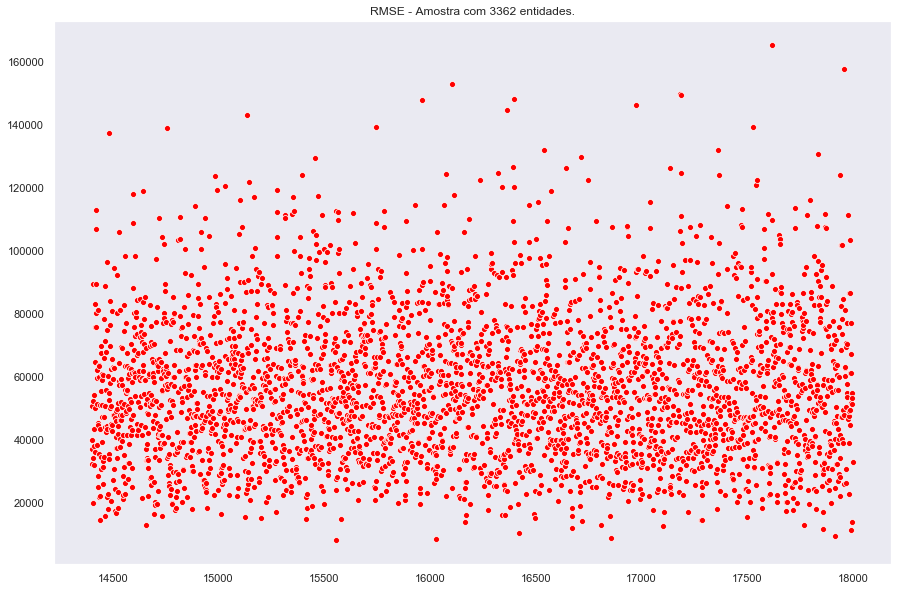

In [41]:
#plotdata = results[ results['RMSE'] < 20000 ]['RMSE']
plotdata = results[ results['Aeroporto'] == 'SBFZ']['RMSE']

f, ax = plt.subplots(figsize=(15, 10))
sns.set_style("dark")
ax.set_title("RMSE - Amostra com %d entidades." % len(plotdata))
sns.scatterplot(data=plotdata, color="red", marker="o", ax=ax)

# R2 SCORE

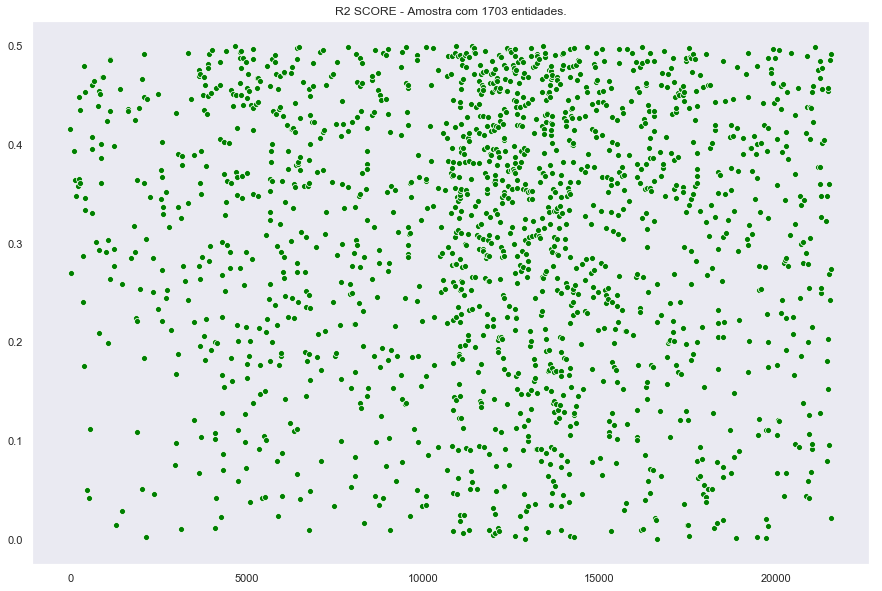

In [28]:
plotdata = results[ (results['R2 SCORE'] < 0.5) ]['R2 SCORE']
#results[ (results['R2 SCORE'] >= 0) & (results['R2 SCORE'] < 0.96) ]['R2 SCORE']

f, ax = plt.subplots(figsize=(15, 10))
sns.set_style("dark")
ax.set_title("R2 SCORE - Amostra com %d entidades." % len(plotdata))
sns.scatterplot(data=plotdata, color="green", ax=ax)

# Média Geral por Algoritmo

In [8]:
grouped_algorithms

Aeroporto  R2 (MIN)  R2 (MAX)  R2 (AVG)   RMSE (MIN)  \
0  DecisionTreeRegressor  0.000612  0.999241  0.797876  5445.239595   
1     ExtraTreeRegressor  0.002023  0.998418  0.784279  7407.912155   
2  RandomForestRegressor  0.000472  0.999797  0.848478  2976.693139   

      RMSE (MAX)     RMSE (AVG)  
0  582174.955799  127676.285526  
1  704144.779923  134783.611190  
2  470202.863212  104567.031302

# Média Geral por Mês

In [19]:
grouped_months

Mes  R2 (MIN)  R2 (MAX)  R2 (AVG)    RMSE (MIN)     RMSE (MAX)  \
0     1  0.002569  0.996556  0.847695  13856.780658  704144.779923   
1     2  0.001524  0.999797  0.804774   2976.693139  450247.110692   
2     3  0.000612  0.998418  0.820241   7407.912155  501560.754599   
3     4  0.010212  0.996727  0.817816  10931.955738  436011.693243   
4     5  0.003721  0.994771  0.802586  14351.744032  447732.029180   
5     6  0.009534  0.998707  0.810537  17897.715912  488657.847868   
6     7  0.023930  0.998778  0.814497  16208.189307  657794.596995   
7     8  0.000472  0.998863  0.796140  12860.514417  506783.818847   
8     9  0.008653  0.997393  0.795521   9464.311055  484417.610193   
9    10  0.002441  0.999038  0.802507  11513.133025  499003.907610   
10   11  0.003945  0.995766  0.803376  11378.663817  475499.955285   
11   12  0.010146  0.997486  0.809593  12941.148049  539838.346144   

       RMSE (AVG)  
0   121325.149323  
1   114535.050032  
2   121468.403047  
3   114742.251549  
4   120954.281114  
5   113204.420827  
6   127542.389197  
7   128814.232488  
8   124791.181905  
9   126238.581166  
10  123331.275197  
11  129386.430078

# Média Geral por Aeroporto/Mês

In [16]:
grouped_airport_months

Aeroporto  Mes  R2 (MIN)  R2 (MAX)  R2 (AVG)    RMSE (MIN)     RMSE (MAX)  \
0       SBBR    1  0.023502  0.995386  0.823659  34631.715992  318465.879091   
1       SBBR    2  0.034929  0.992699  0.806481  26746.074882  261851.484035   
2       SBBR    3  0.083576  0.991914  0.830784  29528.077472  281649.771579   
3       SBBR    4  0.185987  0.990260  0.829268  32648.265197  285184.263025   
4       SBBR    5  0.034798  0.992476  0.844540  38141.866235  306824.412495   
5       SBBR    6  0.033620  0.993083  0.836381  35378.237037  294925.927307   
6       SBBR    7  0.049585  0.998778  0.828910  16208.189307  316580.164422   
7       SBBR    8  0.041768  0.998863  0.836636  16130.344254  277691.612373   
8       SBBR    9  0.009833  0.985555  0.803889  44584.703695  289963.684525   
9       SBBR   10  0.016551  0.999038  0.834876  11818.901885  293998.902909   
10      SBBR   11  0.185664  0.992984  0.840188  32108.969406  287243.407158   
11      SBBR   12  0.033553  0.997030  0.831593  26113.499345  321349.924452   
12      SBFZ    1  0.035435  0.991717  0.888248  16374.245427  122497.779194   
13      SBFZ    2  0.103578  0.996874  0.854726   8357.725684   98231.569792   
14      SBFZ    3  0.000612  0.997081  0.841138   8630.193941  102881.714053   
15      SBFZ    4  0.046648  0.992057  0.828573  16309.647450  123636.644614   
16      SBFZ    5  0.003973  0.992557  0.752112  14351.744032  165185.344288   
17      SBFZ    6  0.036879  0.986754  0.756394  20287.429865  147906.648413   
18      SBFZ    7  0.079624  0.993402  0.804080  18306.550877  148075.449922   
19      SBFZ    8  0.009114  0.992962  0.750178  12860.514417  123987.198828   
20      SBFZ    9  0.040320  0.994873  0.762421   9464.311055   98956.944818   
21      SBFZ   10  0.077147  0.990044  0.780369  14773.817457  119128.704310   
22      SBFZ   11  0.008964  0.995766  0.806208  11378.663817  139432.349978   
23      SBFZ   12  0.010146  0.994489  0.822247  12941.148049  157783.066796   
24      SBGL    1  0.023508  0.994104  0.836162  37309.918283  337772.400485   
25      SBGL    2  0.042117  0.992948  0.752647  31205.245929  304342.859713   
26      SBGL    3  0.146973  0.985985  0.797480  58276.214443  338190.799835   
27      SBGL    4  0.072433  0.989275  0.802169  34322.431579  280054.393197   
28      SBGL    5  0.011840  0.990172  0.793767  44514.721859  333598.592140   
29      SBGL    6  0.091917  0.986641  0.822149  47957.735885  242115.243154   
..       ...  ...       ...       ...       ...           ...            ...   
42      SBGR    7  0.219858  0.995956  0.884392  66026.893464  657794.596995   
43      SBGR    8  0.049917  0.990990  0.901924  97449.328645  506783.818847   
44      SBGR    9  0.284846  0.989719  0.887535  90909.967954  484417.610193   
45      SBGR   10  0.045547  0.995141  0.904151  77241.803104  499003.907610   
46      SBGR   11  0.187383  0.995586  0.897352  61196.332095  475499.955285   
47      SBGR   12  0.029067  0.996338  0.885247  51981.730518  539838.346144   
48      SBPA    1  0.068498  0.996556  0.847191  13856.780658  166682.449639   
49      SBPA    2  0.001524  0.999241  0.794202   5445.239595  140639.962904   
50      SBPA    3  0.079649  0.988602  0.833916  23766.008298  135257.107226   
51      SBPA    4  0.022005  0.996727  0.868057  10931.955738  127170.359008   
52      SBPA    5  0.017135  0.994016  0.825601  16806.579617  135551.013453   
53      SBPA    6  0.044191  0.988678  0.826211  17897.715912  119188.861251   
54      SBPA    7  0.066787  0.991486  0.835218  16980.578686  154289.260565   
55      SBPA    8  0.051149  0.991832  0.801751  18498.922841  159118.970543   
56      SBPA    9  0.013141  0.970049  0.784830  31206.286852  138196.682485   
57      SBPA   10  0.002441  0.983380  0.778280  13808.343933  190000.509912   
58      SBPA   11  0.019198  0.987269  0.762828  24094.376208  156279.942755   
59      SBPA   12  0.043430  0.994508  0.798033  13824.067154  128993.572312   
60 

# Feature Importance

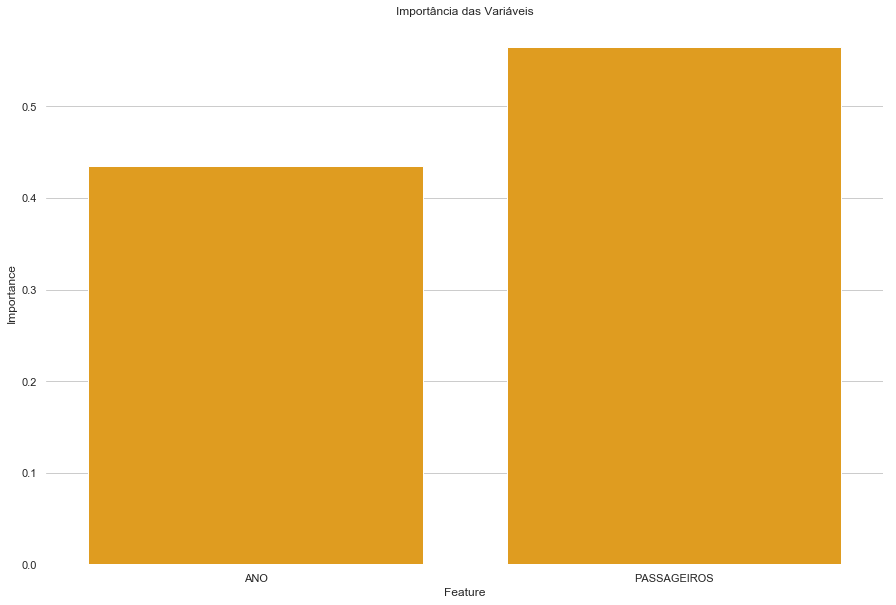

In [22]:
featured_importances = []

featured_importances.append({ "Feature": "ANO", "Importance": grouped_airports['FI_ANO (AVG)'].mean() })
featured_importances.append({ "Feature": "PASSAGEIROS", "Importance": grouped_airports['FI_PAX (AVG)'].mean() })
featured_importances = pd.DataFrame(featured_importances)

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 10))

ax.set_title("Importância das Variáveis")
sns.set_color_codes("pastel")
sns.despine(left=True, bottom=True)
sns.barplot(x="Feature", y="Importance", data=featured_importances, color="orange")

# PAX predictor (General)

In [29]:
results = pd.read_excel('results.xlsx', sheet_name='PaxGeneralPredict1540218836')